In [2]:
import numpy as np
import pandas as pd

# Problem - 1: Perform a classification task with knn from scratch.

1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/diabetes_.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Performing EDA (Exploratory Data Analysis)
data.shape

(768, 9)

In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
print("Data Info: ")
print(data.info())

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
#Data Summary Statistics
print("Summary Statistics")
data.describe()

Summary Statistics


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
missing_info = data.isnull().sum()
missing_info

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [9]:
#Replace 0 with median for each column
for col in data.columns:
  if missing_info[col] > 10:
    data[col].fillna (data[col].replace(0, data[col].median()))
  else:
    data.dropna(subset=[col], inplace=True)

print("Zeros replaced with medians: \n", data.head())

Zeros replaced with medians: 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [10]:
x = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)

  test_split_size = int(len(x) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  x_train, x_test = x[train_indices], x[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split_scratch(x, y, test_size=0.3)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (538, 8)
Shape of x_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [11]:
#Euclidean Distance
def euclidean_distance(a, b):
  if a.shape != b.shape:
    raise ValueError("Input arrays must have the same shape")

  distance = np.sqrt(np.sum((a-b)**2))
  return distance

In [12]:
from ast import Assert
try:
  a = np.array([3, 4])
  b = np.array([0, 0])

  result = euclidean_distance(a, b)

  expected_result = 5.0
  assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
  print("Test passed!")
except ValueError as ve:
  print(f"valueError as {ve}")
except AssertionError as ae:
  print(f"AssertionError as {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Test passed!


In [13]:
#Predict class for a single query
def knn_predict_single(query, x_train, y_train, k=3):

  distances = [euclidean_distance(query, x) for x in x_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [14]:
def knn_predict(x_test, x_train, y_train, k=3):

  predictions = [knn_predict_single(x, x_train, y_train, k) for x in x_test]
  return np.array(predictions)

In [15]:
try:
  x_test_sample = x_test[:5]
  y_test_sample = y_test[:5]

  predictions = knn_predict(x_test_sample, x_train, y_train, k=3)
  print("Predictions:", predictions)
  print("Actual labels:", y_test_sample)

  assert predictions.shape == y_test_sample.shape, ("Predictions and actual labels must have the same shape")

  print("test case passed")
except AssertionError as ae:
  print(f"AssertionError as {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
test case passed


In [16]:
#Evaluating Accuracy
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

try:
  predictions = knn_predict(x_test, x_train, y_train, k=3)
  accuracy = compute_accuracy(y_test, predictions)
  print(f"Accuracy of KNN model on test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexpected error occured")

Accuracy of KNN model on test set: 67.39%


Problem - 2 - Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

Accuracy of KNN model with k=1: 68.70%
Accuracy of KNN model with k=2: 72.61%
Accuracy of KNN model with k=3: 67.39%
Accuracy of KNN model with k=4: 72.17%
Accuracy of KNN model with k=5: 68.70%
Accuracy of KNN model with k=6: 70.00%
Accuracy of KNN model with k=7: 69.13%
Accuracy of KNN model with k=8: 71.30%
Accuracy of KNN model with k=9: 70.00%
Accuracy of KNN model with k=10: 71.74%
Accuracy of KNN model with k=11: 73.04%
Accuracy of KNN model with k=12: 73.91%
Accuracy of KNN model with k=13: 74.35%
Accuracy of KNN model with k=14: 72.61%
Accuracy of KNN model with k=15: 73.91%
Accuracy of KNN model with k=16: 73.48%
Accuracy of KNN model with k=17: 72.61%
Accuracy of KNN model with k=18: 71.30%
Accuracy of KNN model with k=19: 72.17%
Accuracy of KNN model with k=20: 70.87%


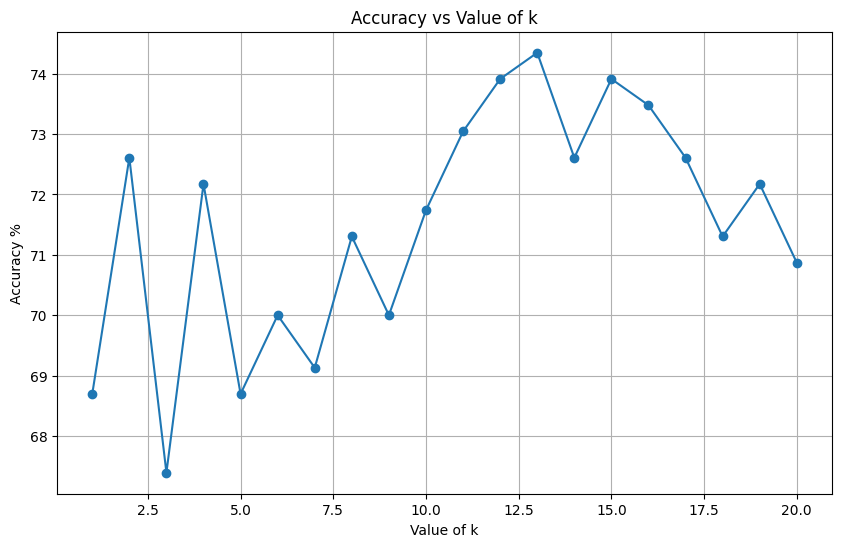

Experiment completed. Check the plot for accuracy.


In [17]:
import matplotlib.pyplot as plt
def experiment_knn_k_values(  x_train, x_test, y_train, y_test, k_values):
  accuracies = {}

  for k in k_values:
    predictions = knn_predict(x_test, x_train, y_train, k=k)
    accuracy = compute_accuracy(y_test, predictions)
    accuracies[k] = accuracy

    print(f"Accuracy of KNN model with k={k}: {accuracy:.2f}%")
  plt.figure(figsize=(10, 6))
  plt.plot(k_values, list(accuracies.values()), marker='o')
  plt.xlabel('Value of k')
  plt.ylabel("Accuracy %")
  plt.title("Accuracy vs Value of k")
  plt.grid(True)
  plt.show()

  return accuracies

k_values = range(1, 21)

try:
  accuracies = experiment_knn_k_values(x_train, x_test, y_train, y_test, k_values)
  print("Experiment completed. Check the plot for accuracy.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [18]:
#Feature scaling (Min-Max Normalilzation)
x_scaled = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
print(x_scaled)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [19]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(x_scaled, y)

In [20]:
#Run KNN on Scaled Data
predictions_scaled = knn_predict(x_test_scaled, x_train_scaled, y_train_scaled, k=3)
accuracy_scaled = compute_accuracy(y_test_scaled, predictions_scaled)
accuracy_scaled

np.float64(69.1304347826087)

In [21]:
#Comparison
print("Accuracy without scaling: ", accuracy)
print("Accuracy with scaling: ", accuracy_scaled)

Accuracy without scaling:  67.3913043478261
Accuracy with scaling:  69.1304347826087


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

In [27]:
#Function to measure accuracy and time
import time
def experiment_knn_k_values(x_train, x_test, y_train, y_test, k_values):
  accuracies = [] # Initialize as a list
  prediction_times = [] # Initialize as a list

  for k in k_values:
    start = time.time()
    predictions = knn_predict(x_test, x_train, y_train, k=k)
    end = time.time()

    accuracies.append(compute_accuracy(y_test, predictions))
    prediction_times.append(end - start)

  return accuracies, prediction_times

In [28]:
#Run for orginal Dataset

k_values = range(1, 16)
accuracies, prediction_times = experiment_knn_k_values(x_train, x_test, y_train, y_test, k_values)

In [29]:
#Run for Scaled Dataset
accuracies_scaled, prediction_times_scaled = experiment_knn_k_values(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, k_values)

4. PLot vs Accuracy

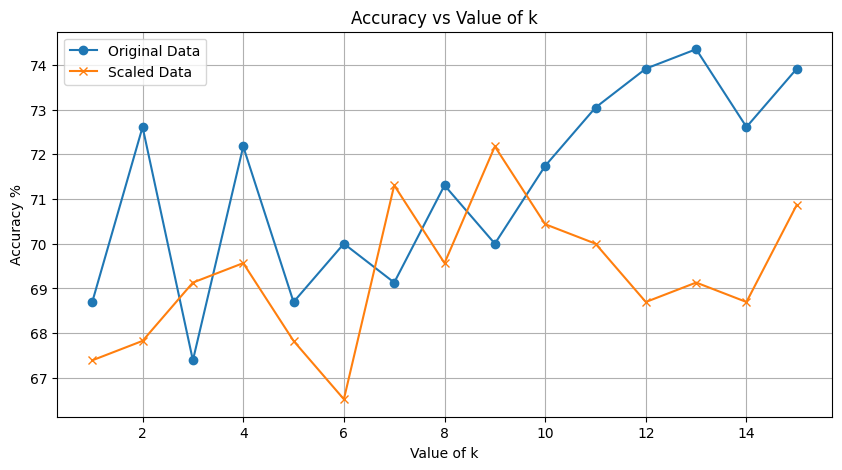

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', label='Original Data')
plt.plot(k_values, accuracies_scaled, marker="x", label="Scaled Data")
plt.xlabel("Value of k")
plt.ylabel("Accuracy %")
plt.title("Accuracy vs Value of k")
plt.legend()
plt.grid(True)
plt.show()

5. PLot k VS Time Taken

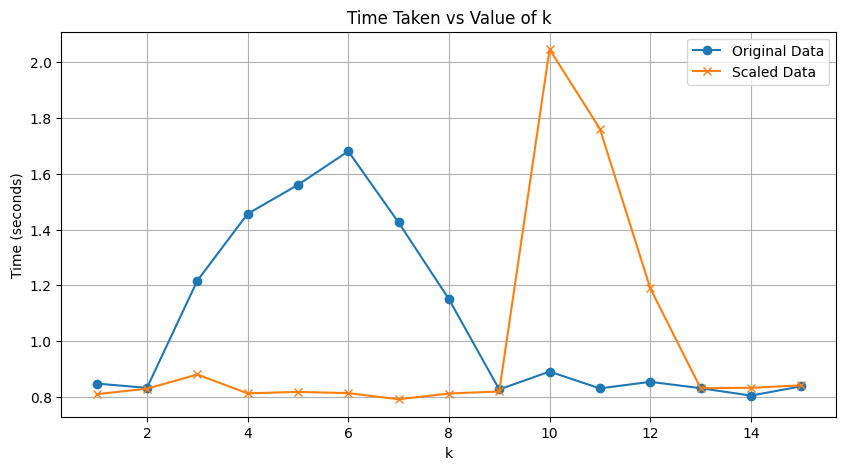

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, prediction_times, marker="o", label="Original Data")
plt.plot(k_values, prediction_times_scaled, marker="x", label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("Time Taken vs Value of k")
plt.legend()
plt.grid(True)
plt.show()